In [2]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1640


<Axes: xlabel='Time'>

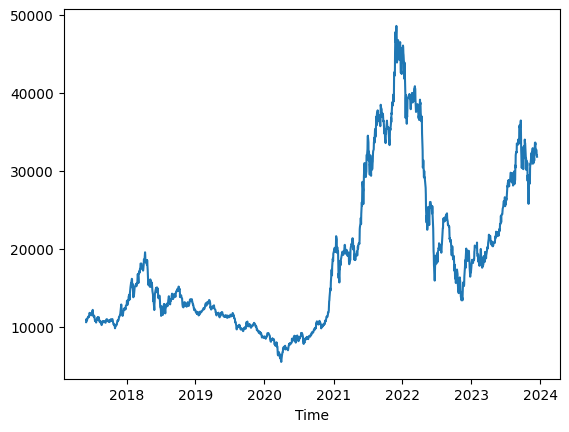

In [3]:
#2. Fetch data and visualize
SSI = stock_historical_data(symbol = "SSI", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(SSI['Close']))
SSI
SSI["Close"].plot()

In [4]:
# Preprocessing
df = SSI['Close']
df=df.reset_index()
df['Lag1'] = range(0, 1640)
df['Lag2'] = df['Lag1'].shift(1)
df['Lag3'] = df['Lag2'].shift(1)
df = df.dropna()
df

,Time,Close,Lag1,Lag2,Lag3
2,2017-06-05,10740,2,1.0,0.0
3,2017-06-06,10870,3,2.0,1.0
4,2017-06-07,10980,4,3.0,2.0
5,2017-06-08,11060,5,4.0,3.0
6,2017-06-09,11140,6,5.0,4.0
...,...,...,...,...,...
1635,2023-12-11,32700,1635,1634.0,1633.0
1636,2023-12-12,32600,1636,1635.0,1634.0
1637,2023-12-13,32000,1637,1636.0,1635.0
1638,2023-12-14,32000,1638,1637.0,1636.0


In [5]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [6]:
#4. Training process
x_train = np.array([train_data['Lag1'],train_data['Lag2'], train_data['Lag3']]).reshape(-1, 3)
y_train = np.array(train_data['Close'])

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
# 5. Testing process
x_test = np.array([test_data['Lag1'],test_data['Lag2'], test_data['Lag3']]).reshape(-1, 3)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)
y_pred

array([14548.66295287, 14563.67569831, 14578.68844376, 14593.70118921,
       14608.71393466, 14623.72668011, 14638.73942556, 14653.75217101,
       14668.76491646, 14683.77766191, 14698.79040735, 14713.8031528 ,
       14728.81589825, 14743.8286437 , 14758.84138915, 14773.8541346 ,
       14788.86688005, 14803.8796255 , 14818.89237095, 14833.90511639,
       14848.91786184, 14863.93060729, 14878.94335274, 14893.95609819,
       14908.96884364, 14923.98158909, 14938.99433454, 14954.00707998,
       14969.01982543, 14984.03257088, 14999.04531633, 15014.05806178,
       15029.07080723, 15044.08355268, 15059.09629813, 15074.10904358,
       15089.12178902, 15104.13453447, 15119.14727992, 15134.16002537,
       15149.17277082, 15164.18551627, 15179.19826172, 15194.21100717,
       15209.22375262, 15224.23649806, 15239.24924351, 15254.26198896,
       15269.27473441, 15284.28747986, 15299.30022531, 15314.31297076,
       15329.32571621, 15344.33846165, 15359.3512071 , 15374.36395255,
      

In [8]:
# 6. 60 days prediction
last_index =  len(df)
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
range_arr_1 = np.array(range(last_index+1, last_index+61))
range_arr_2 = np.array(range(last_index, last_index+60))
range_arr_3 = np.array(range(last_index-1, last_index+59))

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array([range_arr_1,
                          range_arr_2,
                          range_arr_3]).reshape(-1, 3)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[17826.4457092  17841.45845465 17856.47120009 17871.48394554
 17886.49669099 17901.50943644 17916.52218189 17931.53492734
 17946.54767279 17961.56041824 17976.57316369 17991.58590913
 18006.59865458 18021.61140003 18036.62414548 18051.63689093
 18066.64963638 18081.66238183 18096.67512728 18111.68787273
 17821.44146071 17836.45420616 17851.46695161 17866.47969706
 17881.49244251 17896.50518796 17911.51793341 17926.53067886
 17941.54342431 17956.55616975 17971.5689152  17986.58166065
 18001.5944061  18016.60715155 18031.619897   18046.63264245
 18061.6453879  18076.65813334 18091.67087879 18106.68362424
 17816.43721223 17831.44995768 17846.46270313 17861.47544858
 17876.48819403 17891.50093948 17906.51368492 17921.52643037
 17936.53917582 17951.55192127 17966.56466672 17981.57741217
 17996.59015762 18011.60290307 18026.61564852 18041.62839396
 18056.64113941 18071.65388486 18086.66663031 18101.67937576]


In [9]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))

Testing RMSE: 14510.996844809153
Testing MAPE: 38.10796834712854
Testing MAE: 12095.499901542844
MSLR:  0.349375387329663


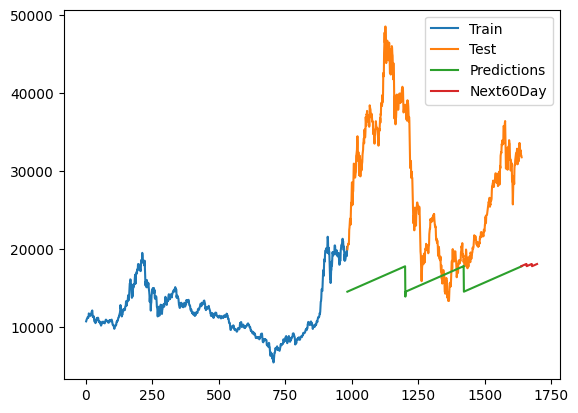

In [10]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()